In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
from scipy import stats
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import shap 
shap.initjs()
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.special import kolmogorov
from scipy.stats import kstwobign
import seaborn as sns

# Projeto

### Resumo 


No mundo globalizado, o desempenho matemático tem-se mostrado uma variável de fundamental importância para o bem estar do indivíduo. Os benefícios em conhecer matemática ao longo da formação básica passam por diferentes áreas de modo que o aprendizado na disciplina é capaz de produzir maiores oportunidades no mercado de trabalho, ganho salarial e mesmo menor associação com psicopatologias. 
Alguns estudos demonstram os riscos do baixo desempenho acadêmico na disciplina. Baixos conhecimentos matemáticos reduzem as oportunidades de emprego e o progresso no mercado de trabalho (Parsons & Binner, 1997). Ao analisar a renda direta na vida adulta, estima-se que 10% na melhoria das notas da matemática durante a educação básica possa incidir em 4,6% no incremento da renda futura do indivíduo (Cury & Filho, 2014). Outros resultados, obtidos através de estudos longitudinais, apontam também para a mesma relação entre o conhecimento da disciplina e o incremento futuro da renda (Ritchie & Bates, 2013). Ao compararmos os efeitos da baixa proficiência em numeracia com o de outras áreas (como a literacia), é possível encontrar evidências apontando para prejuízos ainda maiores decorrentes da perda do desempenho matemático, atuando em aspectos da vida como: auto-estima, conseguir um trabalho em tempo integral com maior nível de complexidade, e engajamento em temas como a política ou o voto (Parsons & Binner, 2005).
Estes resultados chamam a atenção para os possíveis efeitos capazes de reduzir o aprendizado da matemática. Conforme literatura especializada, experiências adversas e de vulnerabilidade estão associadas com uma série de limitações no desenvolvimento (Hughes, et. al. 2017). Alguns resultados apontam para a interação entre estas experiências de violência e/ou vulnerabilidade - como deter menores condições econômicas, morar na zona rural, e realizar trabalho infantil - e o prejuízo no desempenho acadêmico (Andrade & Laros, 2007; Berthelot, 2001; Palermo, 2014).Com intuito de avaliar parte deste problema, o presente projeto tem por intuito analisar como experiências de vulnerabilidade podem incidir sobre o desempenho acadêmico da matemática. 
Considerando a variabilidade individual, econômica e cultural das pessoas que habitam o território nacional, seria possível levantar em que medida variáveis externas ligadas à experiências e aspectos de vulnerabilidade poderiam promover prejuízos no desempenho da matemática? 
Para avaliar as experiências de vulnerabilidade analisaremos variáveis ligadas à disposição familiar como escolaridade materna (avaliando o nível de instrução), presença ou ausência da figura paterna, incentivo e apoio famíliar aos estudos, além de proxys de renda e acesso a infraestrutura como trabalho infantil, morar em rua com acesso a iluminação, ter acesso a computador, água tratada, rua pavimentada, dentre outras.
O objetivo é de identificar como estas variáveis categóricas poderiam interferir no desempenho acadêmico da matemática (variáveis escalar).
Aqui você irá encontrar apenas um resumo dos passos adotados. A documentação da regressão com os respectivos passos adotados podem ser vizualidos no resumo em PDF do projeto.

## Abertura do banco

In [2]:
df = pd.read_spss("SAEB python quinto ano 13 de setembro de 2021.sav")

## Escolha das variáveis

Abaixo a legenda das Features(VI) e Targets(VD) que serão usadas para entender o efeito da vulnerabilidade no desempenho acadêmico.

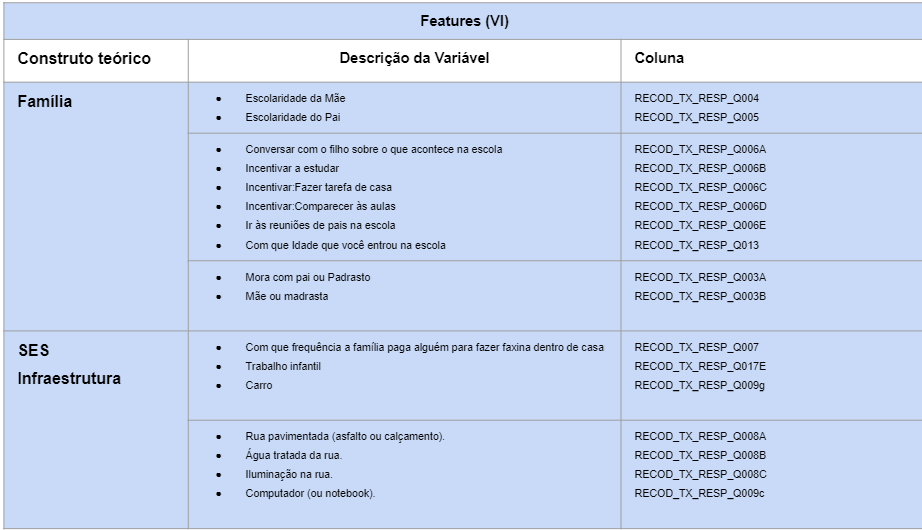

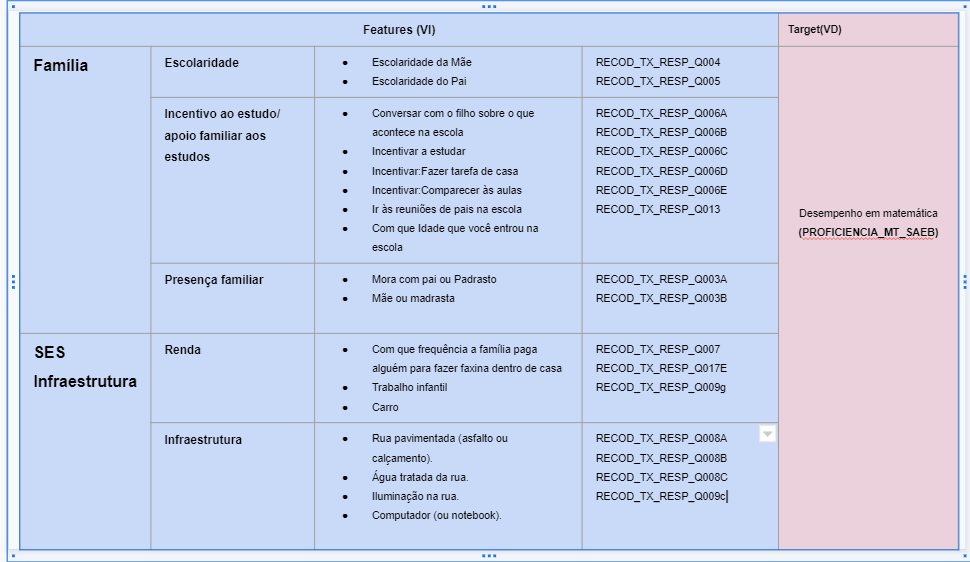

## Selecionando as Variáveis

In [4]:
df = df[["ID_UF", "RECOD_TX_RESP_Q004","RECOD_TX_RESP_Q005", "RECOD_TX_RESP_Q006A","RECOD_TX_RESP_Q006B","RECOD_TX_RESP_Q006C","RECOD_TX_RESP_Q006D","RECOD_TX_RESP_Q006E","RECOD_TX_RESP_Q013","RECOD_TX_RESP_Q003A","RECOD_TX_RESP_Q003B",
"RECOD_TX_RESP_Q007","RECOD_TX_RESP_Q014","RECOD_TX_RESP_Q017E","RECOD_TX_RESP_Q008A","RECOD_TX_RESP_Q008B","RECOD_TX_RESP_Q008C","RECOD_TX_RESP_Q009c","RECOD_TX_RESP_Q009g","PROFICIENCIA_MT_SAEB"]]




## Detecção de valores faltantes

O banco de dados do SAEB também apresentava muitos dados faltantes de variáveis que eram enquadradas pelo python como NaN. 

In [5]:
df.isnull().sum()

ID_UF                         0
RECOD_TX_RESP_Q004      2057144
RECOD_TX_RESP_Q005      2188750
RECOD_TX_RESP_Q006A      982396
RECOD_TX_RESP_Q006B      943730
RECOD_TX_RESP_Q006C      952940
RECOD_TX_RESP_Q006D      972936
RECOD_TX_RESP_Q006E      978896
RECOD_TX_RESP_Q013       644569
RECOD_TX_RESP_Q003A      957897
RECOD_TX_RESP_Q003B     1004148
RECOD_TX_RESP_Q007       930647
RECOD_TX_RESP_Q014       678874
RECOD_TX_RESP_Q017E      949346
RECOD_TX_RESP_Q008A      930910
RECOD_TX_RESP_Q008B      958253
RECOD_TX_RESP_Q008C      943302
RECOD_TX_RESP_Q009c     1002908
RECOD_TX_RESP_Q009g      922318
PROFICIENCIA_MT_SAEB     773863
dtype: int64

## Eliminando valores faltantes com drop(na)

Estas faltas de apresentam como um problema na medida em que impossibilitam algumas técnicas de machine learning que serão usadas no python posteriormente.
Desta forma, elas foram eliminadas do banco de dados através da função dropna(). 

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378700 entries, 225703 to 2061123
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID_UF                 378700 non-null  float64 
 1   RECOD_TX_RESP_Q004    378700 non-null  category
 2   RECOD_TX_RESP_Q005    378700 non-null  category
 3   RECOD_TX_RESP_Q006A   378700 non-null  category
 4   RECOD_TX_RESP_Q006B   378700 non-null  category
 5   RECOD_TX_RESP_Q006C   378700 non-null  category
 6   RECOD_TX_RESP_Q006D   378700 non-null  category
 7   RECOD_TX_RESP_Q006E   378700 non-null  category
 8   RECOD_TX_RESP_Q013    378700 non-null  category
 9   RECOD_TX_RESP_Q003A   378700 non-null  category
 10  RECOD_TX_RESP_Q003B   378700 non-null  category
 11  RECOD_TX_RESP_Q007    378700 non-null  category
 12  RECOD_TX_RESP_Q014    378700 non-null  category
 13  RECOD_TX_RESP_Q017E   378700 non-null  category
 14  RECOD_TX_RESP_Q008A   378700 n

A representação acima demonstra a descrição de cada uma das variáveis com seu respectivo N padronizado. 
Através dela, é possível observar o valor total da amostra (n = 378700)


## Analisando variabilidade das features

In [8]:
df["RECOD_TX_RESP_Q004"].value_counts()/378700*100

Ensino Médio completo.                                31.640613
Ensino Superior completo (faculdade ou graduação).    24.706628
Ensino Fundamental completo.                          20.458146
Ensino Fundamental, até o 5º ano.                     12.577766
Não completou o 5º ano do Ensino Fundamental.         10.616847
Name: RECOD_TX_RESP_Q004, dtype: float64

In [9]:
df["RECOD_TX_RESP_Q005"].value_counts()/378700*100

Ensino Médio completo.                                28.864008
Ensino Superior completo (faculdade ou graduação).    22.457090
Ensino Fundamental completo.                          19.724584
Ensino Fundamental, até o 5º ano.                     15.125165
Não completou o 5º ano do Ensino Fundamental.         13.829152
Name: RECOD_TX_RESP_Q005, dtype: float64

In [10]:
df["RECOD_TX_RESP_Q006A"].value_counts()/378700*100

Sempre ou Quase sempre    49.935569
De vez em quando          42.243200
Nunca ou Quase nunca       7.821231
Name: RECOD_TX_RESP_Q006A, dtype: float64

In [11]:
df["RECOD_TX_RESP_Q006B"].value_counts()/378700*100

Sempre ou quase sempre.    87.110906
De vez em quando.          10.167415
Nunca ou quase nunca.       2.721679
Name: RECOD_TX_RESP_Q006B, dtype: float64

In [12]:
df["RECOD_TX_RESP_Q006C"].value_counts()/378700*100

Sempre ou quase sempre    81.616583
De vez em quando          13.944547
Nunca ou quase nunca       4.438870
Name: RECOD_TX_RESP_Q006C, dtype: float64

In [13]:
df["RECOD_TX_RESP_Q006B"].value_counts()/378700*100

Sempre ou quase sempre.    87.110906
De vez em quando.          10.167415
Nunca ou quase nunca.       2.721679
Name: RECOD_TX_RESP_Q006B, dtype: float64

In [14]:
df["RECOD_TX_RESP_Q006C"].value_counts()/378700*100

Sempre ou quase sempre    81.616583
De vez em quando          13.944547
Nunca ou quase nunca       4.438870
Name: RECOD_TX_RESP_Q006C, dtype: float64

In [15]:
df["RECOD_TX_RESP_Q006D"].value_counts()/378700*100

Sempre ou quase sempre    90.920518
De vez em quando           6.169263
Nunca ou quase nunca       2.910219
Name: RECOD_TX_RESP_Q006D, dtype: float64

In [16]:
df["RECOD_TX_RESP_Q006E"].value_counts()/378700*100

Sempre ou quase sempre    61.427779
De vez em quando          29.945075
Nunca ou quase nunca       8.627145
Name: RECOD_TX_RESP_Q006E, dtype: float64

In [17]:
df["RECOD_TX_RESP_Q007"].value_counts()/378700*100

Nunca ou quase nunca.                                              73.580935
De vez em quando (uma vez por semana, a cada quinze dias etc.).    15.237919
Sempre ou quase sempre (ex.: três ou mais dias por semana).        11.181146
Name: RECOD_TX_RESP_Q007, dtype: float64

In [18]:
df["RECOD_TX_RESP_Q014"].value_counts()/378700*100

Somente em escola pública.                   75.740692
Em escola pública e em escola particular.    16.967256
Somente em escola particular.                 7.292052
Name: RECOD_TX_RESP_Q014, dtype: float64

In [19]:
df["RECOD_TX_RESP_Q017E"].value_counts()/378700*100 

Não uso meu tempo para isso    86.146818
Mais de 2 horas.                5.514655
Menos de 1 hora.                5.186427
Entre 1 e 2 horas.              3.152099
Name: RECOD_TX_RESP_Q017E, dtype: float64

In [20]:
df["RECOD_TX_RESP_Q008A"].value_counts()/378700*100

Sim    73.909691
Não    26.090309
Name: RECOD_TX_RESP_Q008A, dtype: float64

In [21]:
df["RECOD_TX_RESP_Q008B"].value_counts()/378700*100

Sim    78.54423
Não    21.45577
Name: RECOD_TX_RESP_Q008B, dtype: float64

In [22]:
df["RECOD_TX_RESP_Q008C"].value_counts()/378700*100

Sim    89.612622
Não    10.387378
Name: RECOD_TX_RESP_Q008C, dtype: float64

In [23]:
df["RECOD_TX_RESP_Q009c"].value_counts()/378700*100

Nenhum       39.781885
1            38.728809
2            15.153684
3 ou mais     6.335622
Name: RECOD_TX_RESP_Q009c, dtype: float64

In [24]:
df["RECOD_TX_RESP_Q009g"].value_counts()/378700*100

1            43.982044
Nenhum       36.073145
2            14.531291
3 ou mais     5.413520
Name: RECOD_TX_RESP_Q009g, dtype: float64

## Analisando distribuição da variável target

<AxesSubplot:>

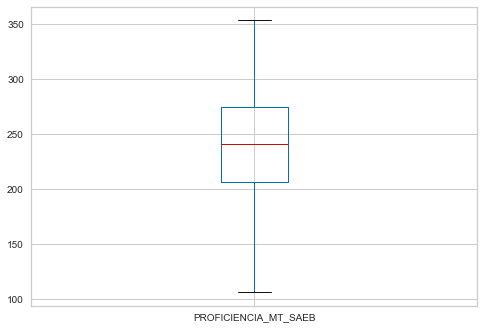

In [25]:
df["PROFICIENCIA_MT_SAEB"].plot(kind="box") 

<AxesSubplot:xlabel='PROFICIENCIA_MT_SAEB', ylabel='Count'>

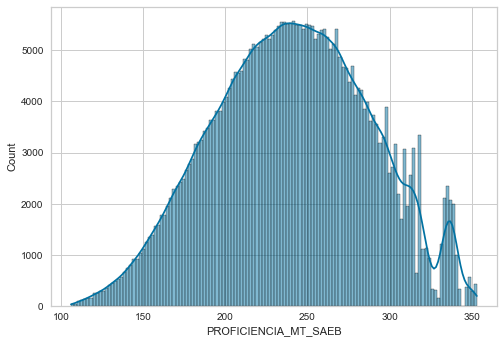

In [26]:
sns.histplot(data=df, x="PROFICIENCIA_MT_SAEB",kde = True)

Através da visualização do histograma, é possível avaliar uma tendência de desajuste da curva normal no extremo dos alunos com desempenho acima de 300. Esse desvio pode se apresentar como um problema para a realização de testes paramétricos.
Na próxima etapa, para tentar compreender a relação entre vulnerabilidade e desempenho acadêmico, realizaremos uma regressão linear. Através desta regressão se a distribuição dos resíduos se organiza de forma normal.

In [27]:
df.describe()

,ID_UF,PROFICIENCIA_MT_SAEB
count,378700.000000,378700.000000
mean,32.314434,240.309836
std,10.042947,47.445980
min,11.000000,105.998488
25%,26.000000,206.471025
50%,33.000000,240.752487
75%,35.000000,274.357414
max,53.000000,353.089638


## Modelagem

### Esolha das Features

In [28]:
X = df[["RECOD_TX_RESP_Q004","RECOD_TX_RESP_Q006A",
        "RECOD_TX_RESP_Q006B","RECOD_TX_RESP_Q006C","RECOD_TX_RESP_Q006D","RECOD_TX_RESP_Q006E","RECOD_TX_RESP_Q013","RECOD_TX_RESP_Q003A",
        "RECOD_TX_RESP_Q003B","RECOD_TX_RESP_Q007","RECOD_TX_RESP_Q014","RECOD_TX_RESP_Q017E","RECOD_TX_RESP_Q008A","RECOD_TX_RESP_Q008B",
        "RECOD_TX_RESP_Q008C","RECOD_TX_RESP_Q009c","RECOD_TX_RESP_Q009g", "RECOD_TX_RESP_Q005"]]

### Transformando variáveis

In [29]:
X = pd.get_dummies(X)

### Escolha do Target

In [30]:
y = df["PROFICIENCIA_MT_SAEB"]

Definimos o modelo de predição geral através de um test-size que incorpore cerca de ⅔ (67%) dos dados. 
Com intuito de estabelecer critérios claros de reprodutibilidade, definimos um valor = 5 para o  random-state.


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .67, random_state = 5)

## Implementando modelo de regressão linear Mulripla

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [39]:
mod = sm.OLS(y_train, X_train, hasconst = True)

In [40]:
resultado = mod.fit()

In [41]:
print(resultado.summary())

                             OLS Regression Results                             
Dep. Variable:     PROFICIENCIA_MT_SAEB   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.179
Method:                   Least Squares   F-statistic:                     699.6
Date:                  Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                          22:33:49   Log-Likelihood:            -6.4723e+05
No. Observations:                124970   AIC:                         1.295e+06
Df Residuals:                    124930   BIC:                         1.295e+06
Df Model:                            39                                         
Covariance Type:              nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

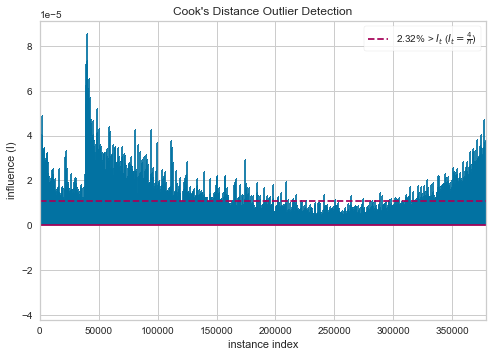

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [44]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

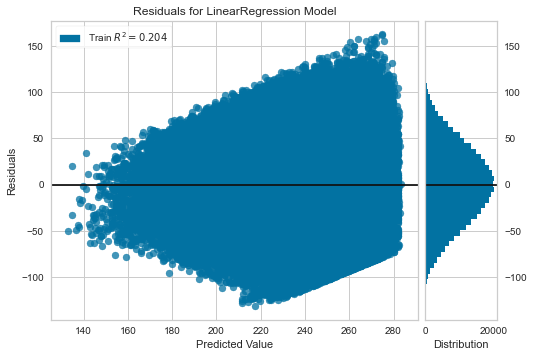

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
X_li, y_li = X[i_less_influential], y[i_less_influential]

model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li, y_li)
visualizer_residuals.show()

O valor do teste Kolmogorov é: 0.4758388412483871 com um p-value = 0.0


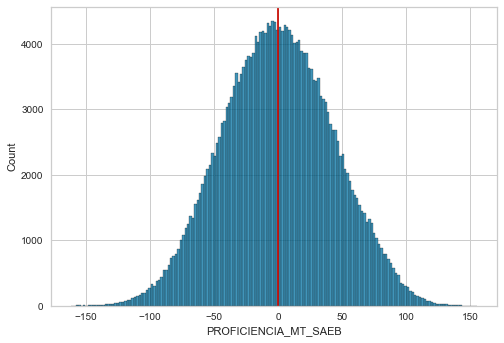

In [46]:
residuals = y_test - y_pred
sns.histplot(x=residuals)
plt.axvline(x=0, c='r')
D, p = stats.kstest(residuals, 'norm')
print(f'O valor do teste Kolmogorov é: {D} com um p-value = {p}')

Avaliando graficamente a distribuição dos resíduos, segundo a representação acima seria possível questionar ainda se a distribuição dos resíduos é ou não é normal. 
Para tanto, realizamos o teste Kolmogorov-Smirnov onde foi detectado que o valor de p de significância é menor que 0,05 (p=0,001). 
Este valor assume que nossa distribuição não é normal.
Com intuito de estabelecer uma análise que se adapte melhor à disposição do banco de dados e do modelo, foi implementado um modelo de regressão random forest regression. 


## Implementando RandonForest Regression

In [61]:
model = RandomForestRegressor(max_depth=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [62]:
y_pred = model.predict(X_test)

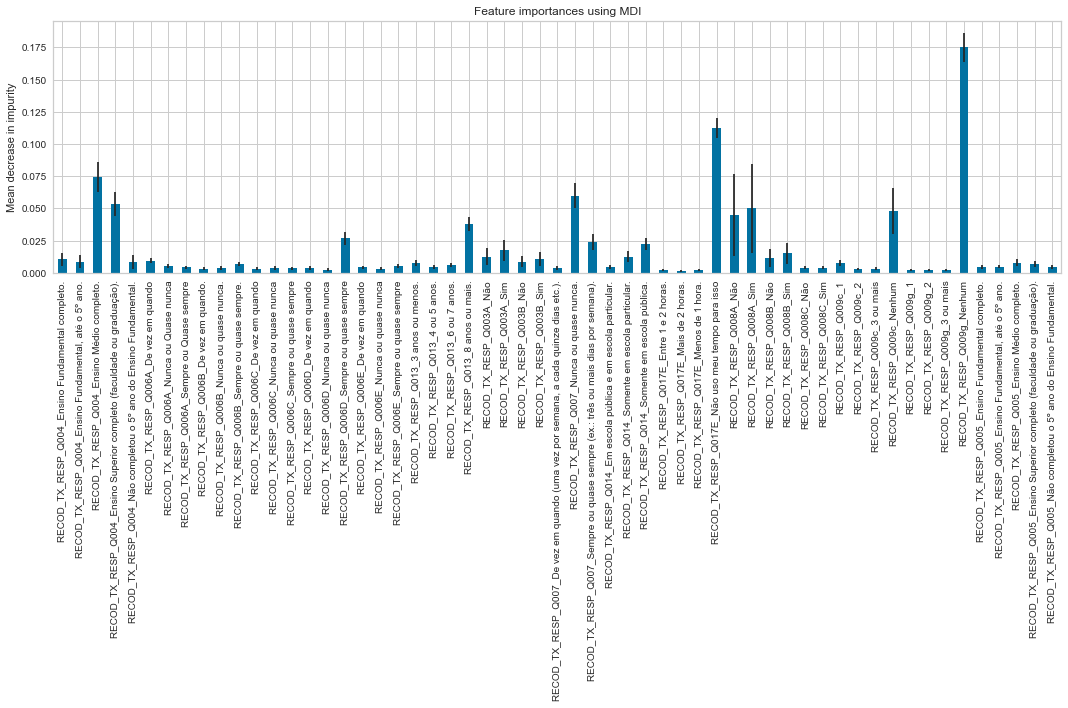

In [66]:
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Não possuir carro, a criança não trabalhar ao longo do quinto ano, pavimentação da rua, e grau de instrução materno surgiram como as principais features explicativas do desempenho da matemática. 
Para analisar o peso de cada uma destas variáveis criamos um gráfico de shap usando a biblioteca que carrega o mesmo nome.


In [63]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [64]:
print(r2_score(y_test, y_pred))
print(r2_score(y_train, y_pred_train))

0.17882550819766518
0.17890206445275225


In [65]:
def mape (y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)/y_true)

In [59]:
print(mape(y_test,y_pred))
print(mape(y_train,y_pred_train))

0.16055010191563165
0.15490643312501745


In [213]:
model = RandomForestRegressor(max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [214]:
y_pred = model.predict(X_test)

In [203]:
print(r2_score(y_test, y_pred))
print(r2_score(y_train, y_pred_train))

0.17881950924970924
0.17890206445275225


In [215]:
print(mape(y_test,y_pred))
print(mape(y_train,y_pred_train))

0.16064447239426238
0.15490643312501745


In [67]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

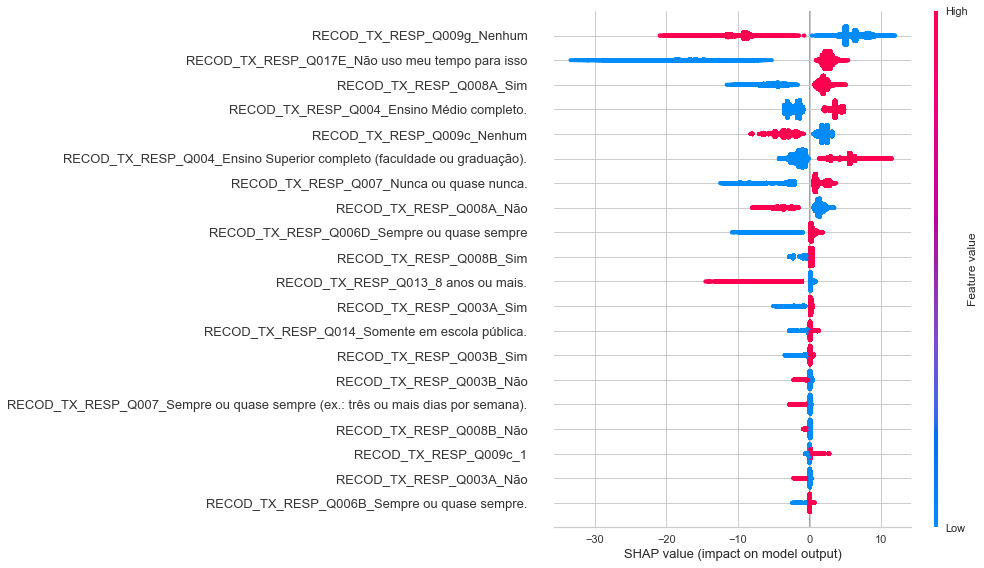

In [212]:
exp = shap.TreeExplainer(model)
vals = exp.shap_values(X_test)

shap.summary_plot(vals, X_test)

Através deste gráfico, é possível calcular o quanto cada feature (eixo vertical) impacta no desempenho acadêmico de acordo com a pontuação (eixo horizontal da reta). O gráfico apresenta as cores azuis representando o valor de 0 (onde o fenômeno da feature não está presente) e com a vermelha (valor = 1) onde a característica encontra-se presente.
Neste gráfico, é possível perceber que alunos que respondem negativamente trabalho infantil chegam a perder mais de 30 pontos nos testes de desempenho em matemática. Possuir nenhum carro possui uma grande dispersão de resultados. Embora o prejuízo chegue a uma perda de 20 pontos, há muitos casos onde alunos chegam a ganhar mais de 10 pontos. No campo da família, a mãe possuir ensino superior completo atua principalmente de forma positiva no desempenho dos estudantes (ganhos até 15 pontos). Outros resultado que merece atenção, encontram-se no atraso e o incentivo em comparecer às aulas. é o aluno começar a escola com treze anos ou mais na escola. Alunos com este atraso escolar chegam a perder até 15 pontos na avaliação. Pais que não incentivam a criança a comparecer sempre ou quase sempre na escola também indicam uma perda de pontuação que chega a 10 pontos.

## Considerações

O presente projeto teve por principal intuito avaliar através de dados transversais sociodemográficos como experiências de vulnerabilidade incidem sobre o desempenho acadêmico da matemática. Para tanto, adotamos técnicas e procedimentos estatísticos que demonstraram que o banco de dados governamental não obedece a uma distribuição normal. Desta forma, ao adotar o modelo random forest regression, mais afeito a distribuições não-paramétricas, constatou-se que o modelo adotado explicou cerca de 17% da variância dos resultados com features que poderiam incidir na perda de quase 10% do desempenho da prova de matemática. Contudo, é preciso destacar algumas limitações deste empreendimento. Como principais limitações, é possível destacar:
 O valor de mape do Randomforest (~0,15);
Não avaliação da multicolinearidade do modelo;
O uso acentuado de variáveis sendo categorizadas de acordo com o critério dummy;
Não adoção de variáveis neuropsicológicas, mais ligadas ao indivíduo, na interpretação do fenômeno do desempenho escolar da matemática.;

Este projeto não leva em conta variáveis pertencentes a atributos cognitivos do indivíduo como inteligência, memória de trabalho, personalidade, dentre outras variáveis que costumam explicar a maior parcela da variância dos resultados (Herrnstein & Murray, 2010). Infelizmente, não existe até a presente data uma política nacional do estado de cômputo destas informações. O registro delas demandaria uma coleta especializada que, por consequência, demandaria maiores esforços e investimentos por parte do Estado.
Entretanto, é possível afirmar que estes resultados são expressivos na medida em que o poder explicativo destas variáveis ultrapassa mesmo a influência da escola na avaliação do desempenho acadêmico quando comparamos com outros resultados internacionais (Berthelot, 2001). 
Creio ser possível destacar que os resultados aqui apresentados reiteram a importância de pesquisas translacionais capazes de apontar para o risco que experiências de vulnerabilidade podem promover no desempenho acadêmico da matemática. A integração de diferentes áreas na tentativa de promover uma educação baseada em evidências parece ter um efeito promissor em uma política que tente reduzir a perda do desempenho acadêmico (Simplício, et al, 2020). Considerando a alta dependência da matemática na implementação de ferramentas dentro do mundo globalizado, parece imprescindível avaliar os fatores que poderiam incidir diretamente sobre a perda de desempenho na disciplina.
